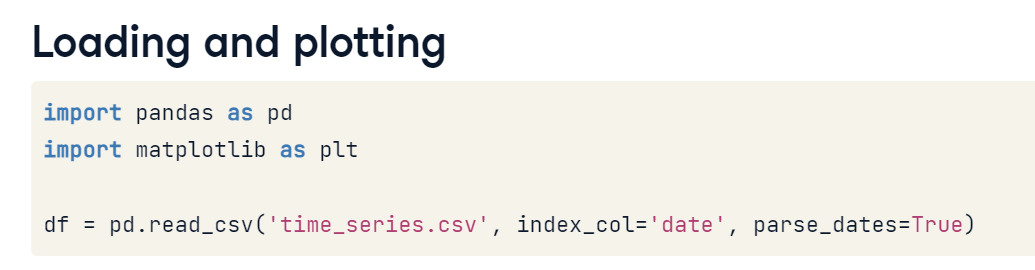


* Trend
* Seasonality
* Cyclicality 주기성 : 패턴 O 고정된 기간 X
* White noise 일련 측정값으로 이전 값과 독립.




* Stationarity 정상성 : 분포가 시간에 따라 변하지 않음. 조건은 3가.
1. Trend is zero  / 2. Variance is constant 제로 라인에서 데이터 포인트의 평균거리는 변하지 않아. / 3.Autocorrelation is constant 자기상관은 일정. 시계열 각 값이 이웃과 관련된 방식은 동일.

* Train-test split.
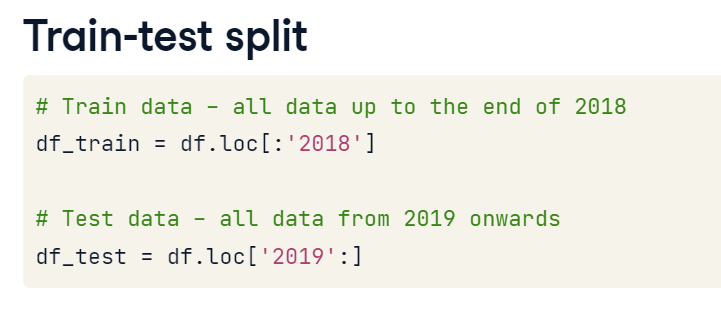

In [ ]:
# 퀴즈 1-1

# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('candy_production.csv',
                 index_col='date',
                 parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

1-1
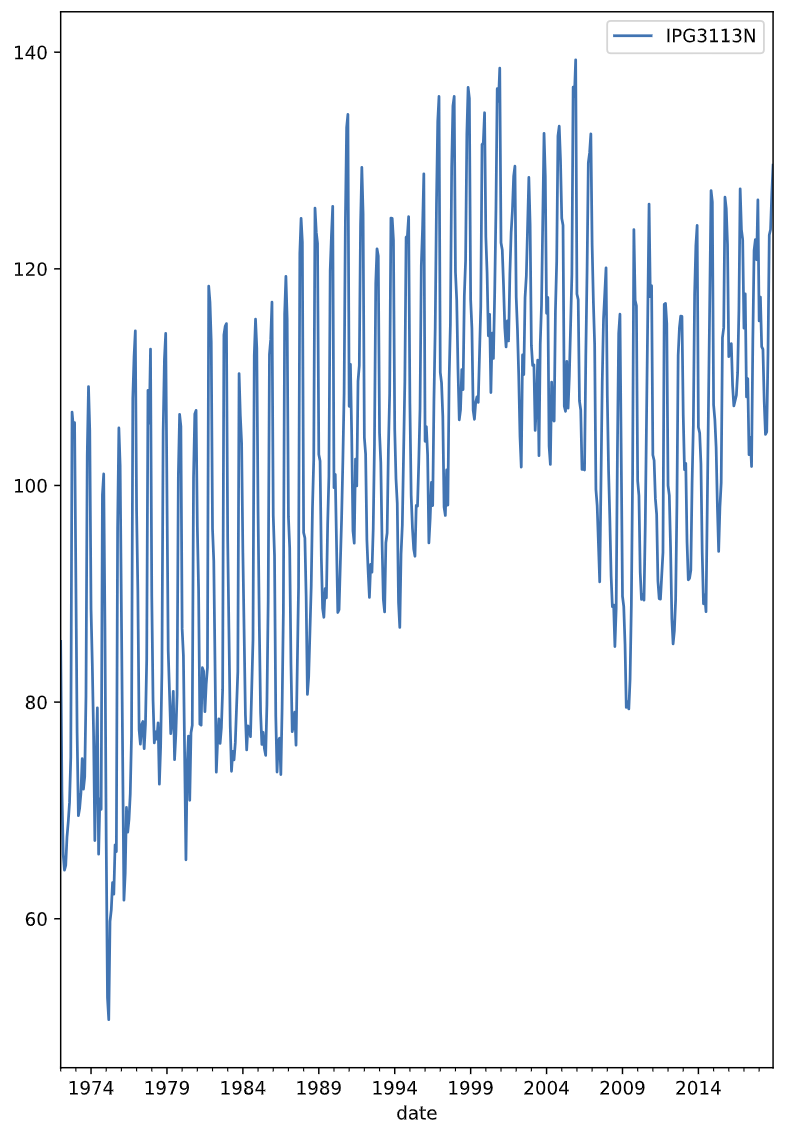

In [ ]:
#퀴즈1-2

# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

NameError: ignored

1-2
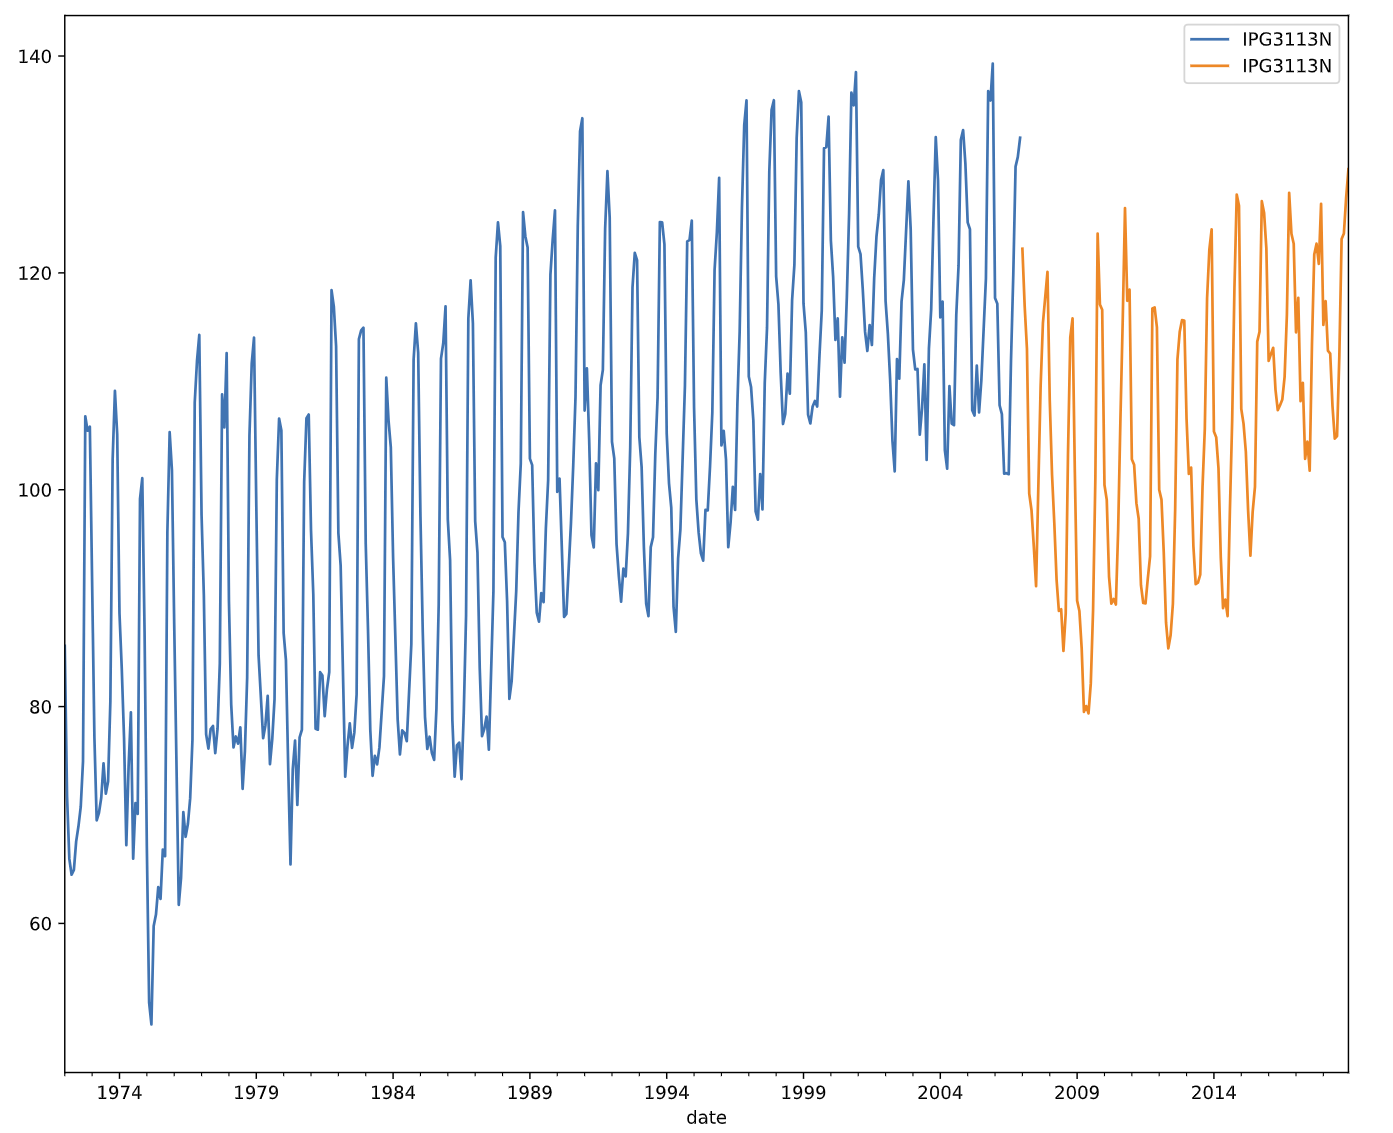

퀴즈 1-3

1. Trend가 있어서 정상성 X
2.
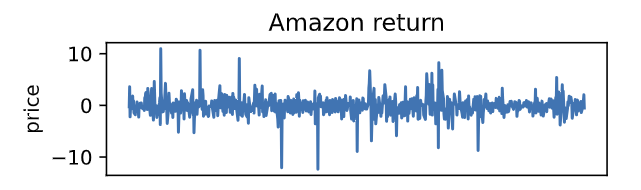

변동성이 시간에 따라 달라져서 계절성 X.

3.정상성 O

# 비정상 시계열을 정상 시계열로 변환.

* The augmented Dicky-Fuller test
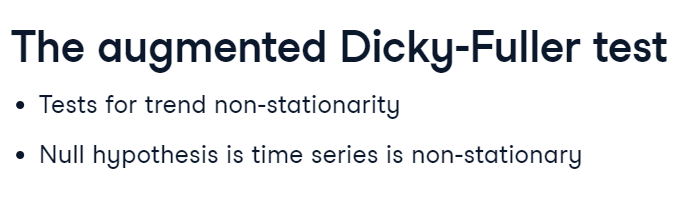

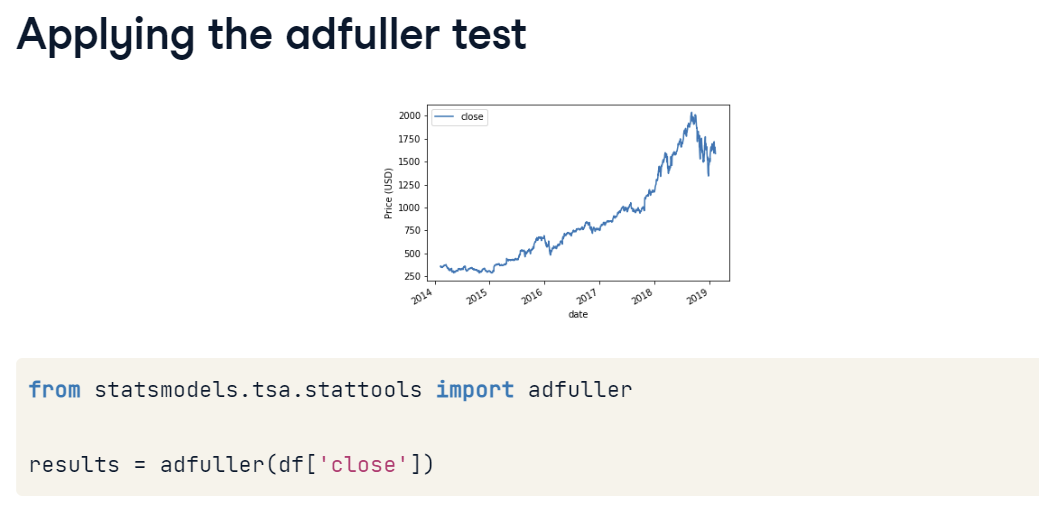


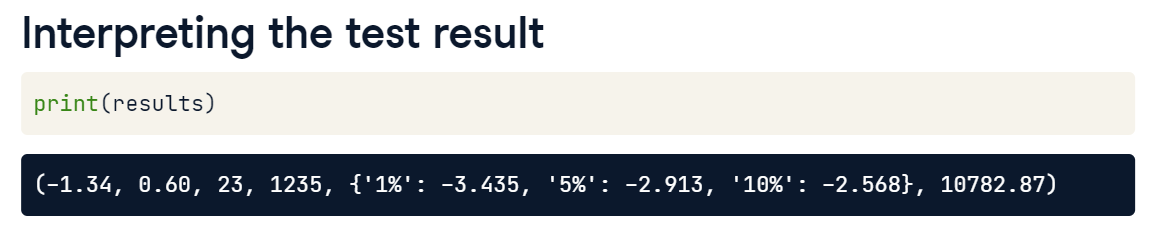

* 결과는 튜플로나오고 이 숫자가 음수일수록 (-1.34) 정상적일 확률이 높음.
* 다음은 p-value인 0.60. 보통 0.05 보다 작으면 귀무가설을 기각해서 시계열이 정상이라고 가정.
* {} 안에 있는건 간단히 말해 5% 유의수준에 대한 통계치는 -2.913이라는 것.

Dicky uller는 추세 정상성에대해서만 테스트.

정상성으로 만드는 방법 중에 하나는 Taking the difference = 차분.
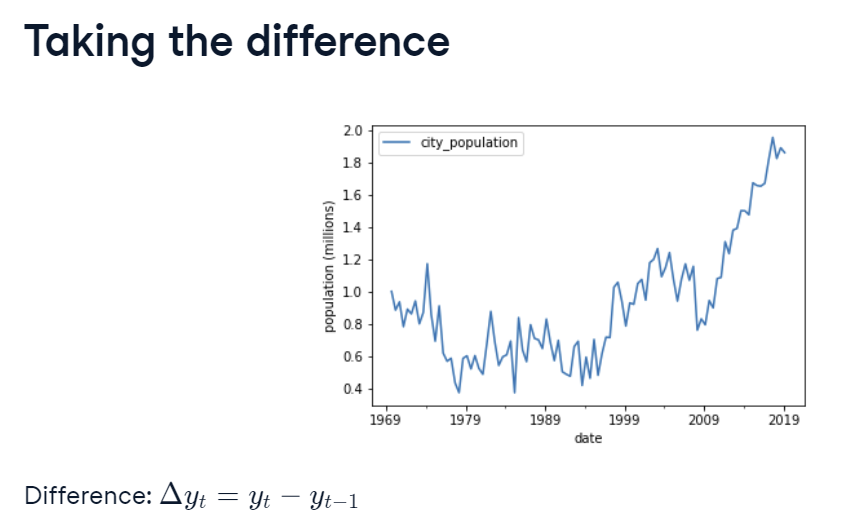

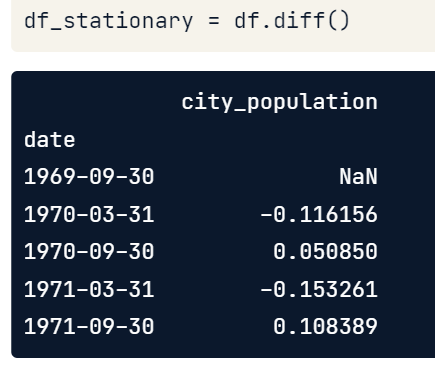

처음엔 뺄 이전 값이 없으니 NAN.
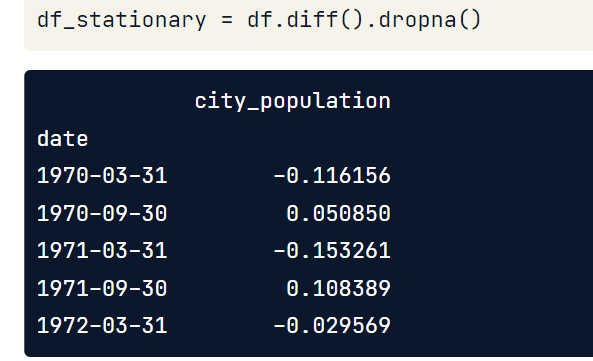

dropna로 대체가능.

정상시계열로 만들기위해 다른 transform도 존재.
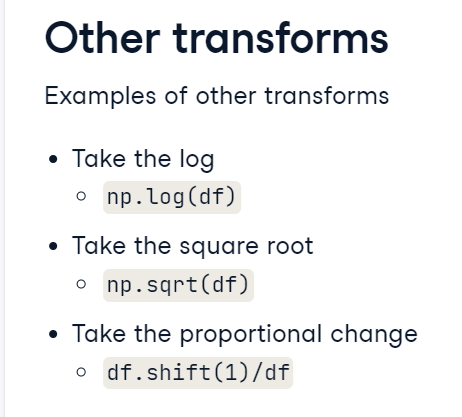

로그 루트 등.

In [ ]:
#퀴즈 2-1

# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(-3.183192251191782)

# Print p-value
print(0.02097842525600371)

# Print critical values
print(-2.8921519665075235) #5%

# # Import augmented dicky-fuller test function
# from statsmodels.tsa.stattools import adfuller

# # Run test
# result = adfuller(earthquake['earthquakes_per_year'])

# # Print test statistic
# print(result[0])

# # Print p-value
# print(result[1])

# # Print critical values
# print(result[4])

NameError: ignored

In [ ]:
# 퀴즈 2-2

# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0] #-0.8146211646182102 )
print('p-value:', result[1] #0.8147894381484784)

퀴즈 2-2 plot
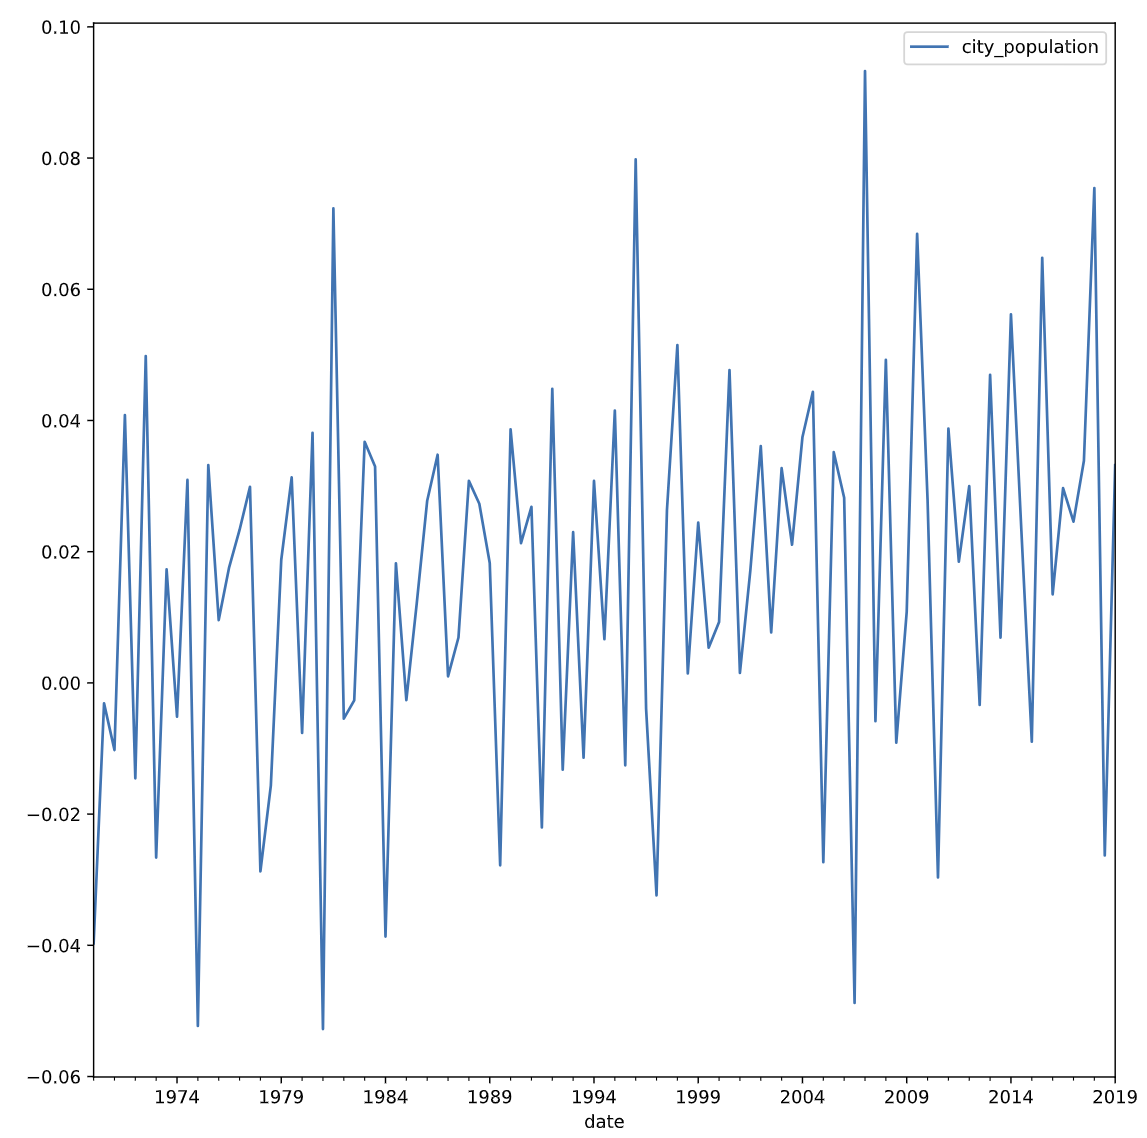

In [ ]:
#퀴즈 2-3

# Calculate the first difference and drop the nans
print(amazon)
amazon_diff = amazon.diff()
print(amazon_diff)
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

In [ ]:
#퀴즈 2-3 결과

# print(amazon)
#               close
# date
# 2019-02-08  1588.22
# 2019-02-07  1614.37
# 2019-02-06  1640.26
# 2019-02-05  1658.81
# 2019-02-04  1633.31
# ...             ...
# 2014-02-14   357.35
# 2014-02-13   357.20
# 2014-02-12   349.25
# 2014-02-11   361.79
# 2014-02-10   360.87

# print(amazon_diff)
#             close
# date
# 2019-02-08    NaN
# 2019-02-07  26.15
# 2019-02-06  25.89
# 2019-02-05  18.55
# 2019-02-04 -25.50
# ...           ...
# 2014-02-14   3.70
# 2014-02-13  -0.15
# 2014-02-12  -7.95
# 2014-02-11  12.54
# 2014-02-10  -0.92



print(result_diff)
# # 결과 : (-7.20357948881125, 2.33127172548712e-10, 23, 1234,
#  {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)

In [ ]:
#퀴즈 2-4

# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

2-4
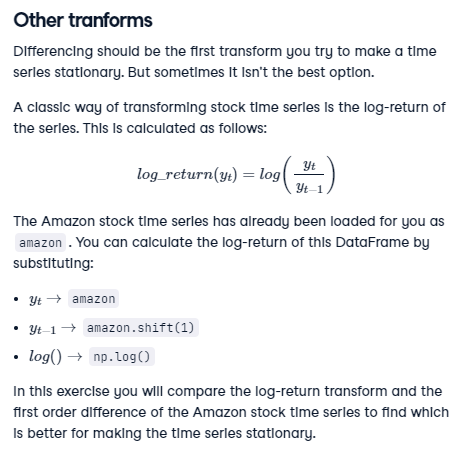

## AR model
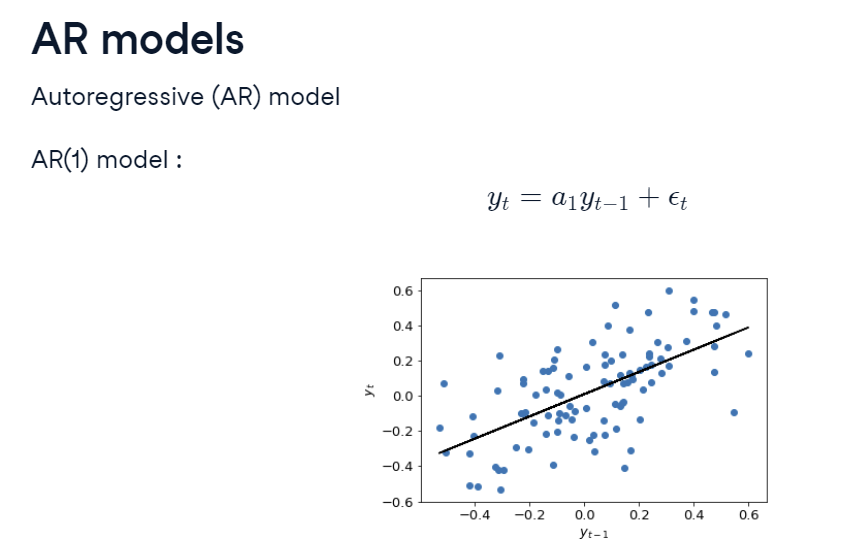

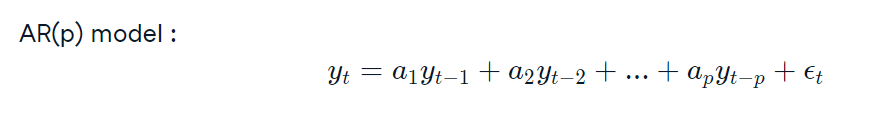




## MA Model

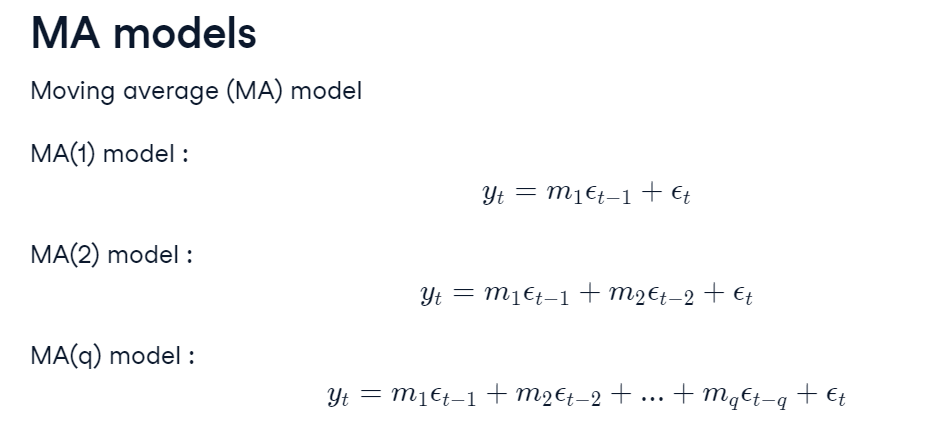




## ARMA

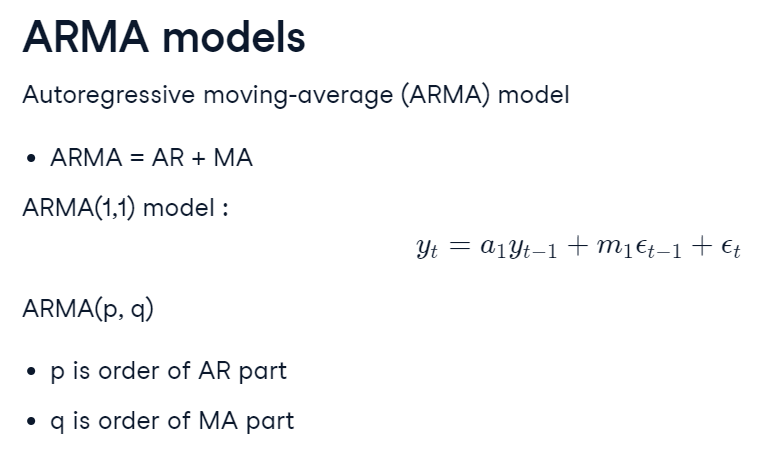

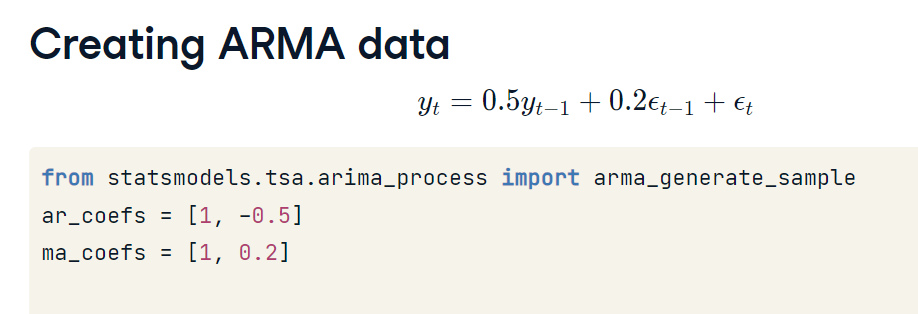
주의해야할 점은 AR계수에 대해서는 반대 부호를 적어야 함.
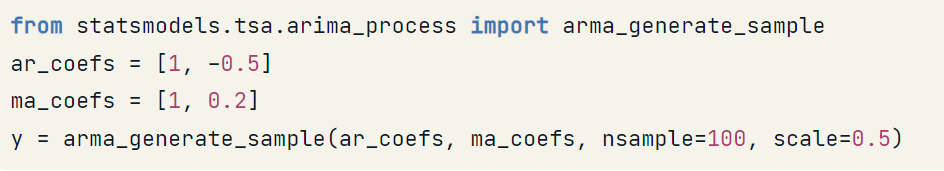


미리보는 Fitting.
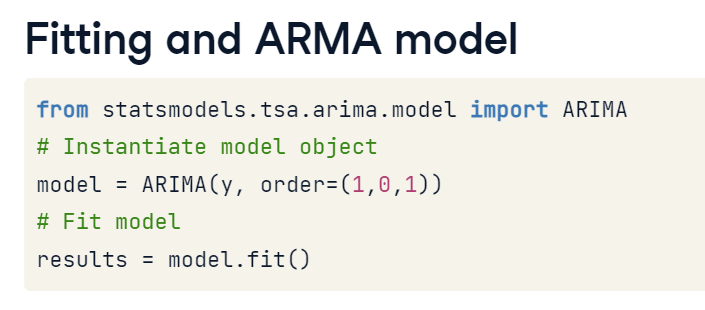

In [ ]:
#퀴즈 3-1
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coefs = [2, -0.4]
ma_coefs = [3, 0.3]
y= arma_generate_sample(ar_coefs,ma_coefs,nsample = 100, scale = 0.5)

#이거 콘솔 안에 있는걸 확인하라는데 어떻게 하는건지......

퀴즈 3-2-1
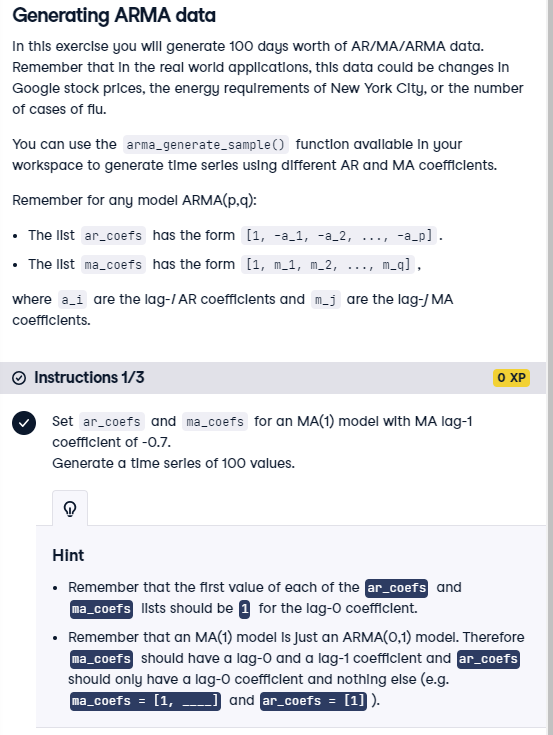

In [ ]:
#퀴즈 3-2-1
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()



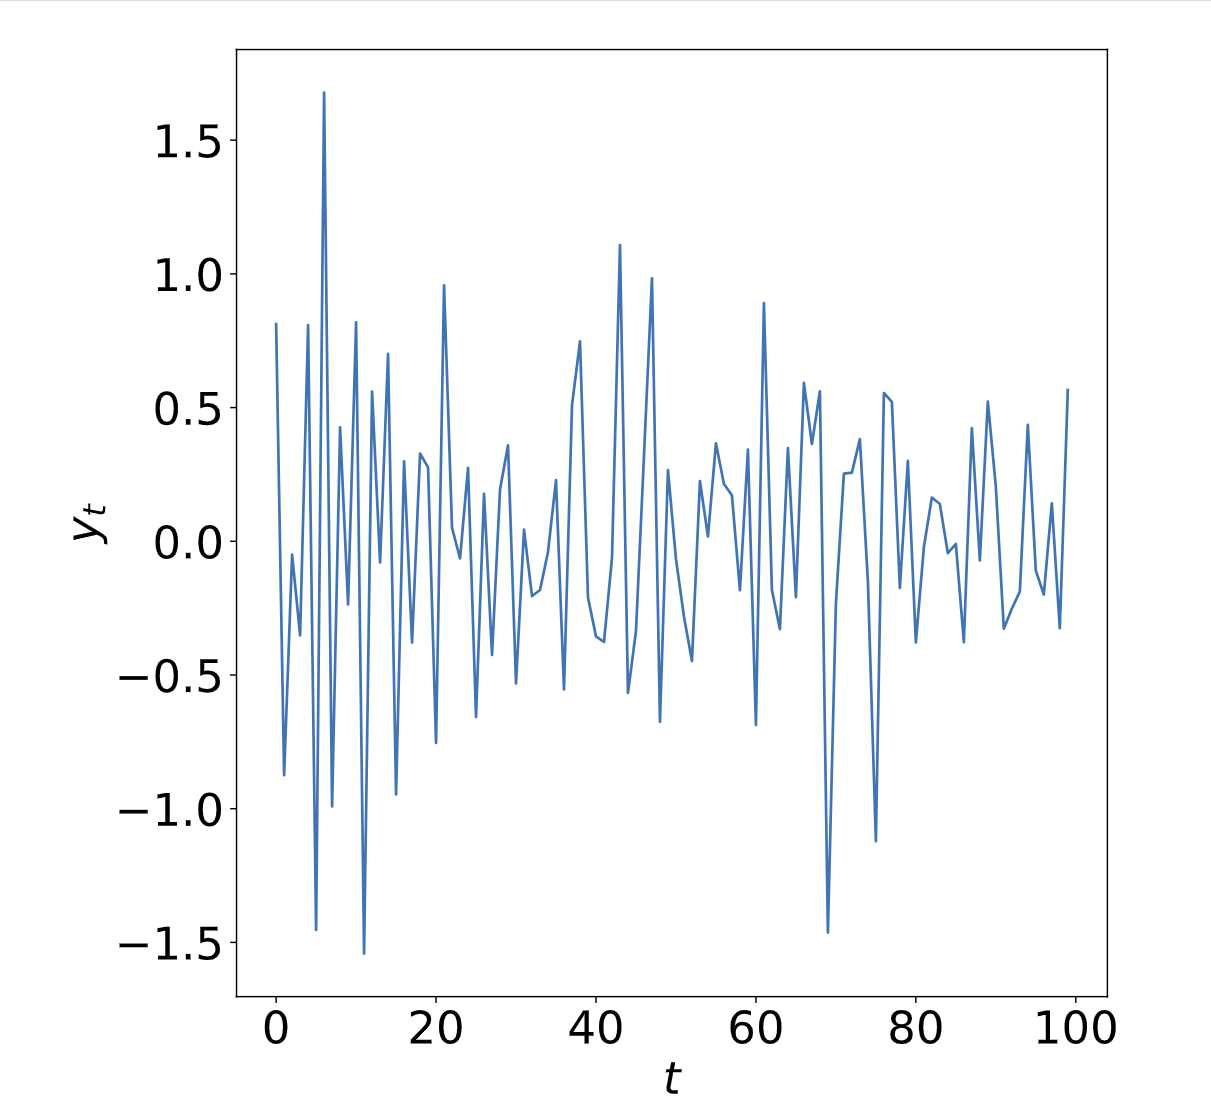

퀴즈 3-2-2
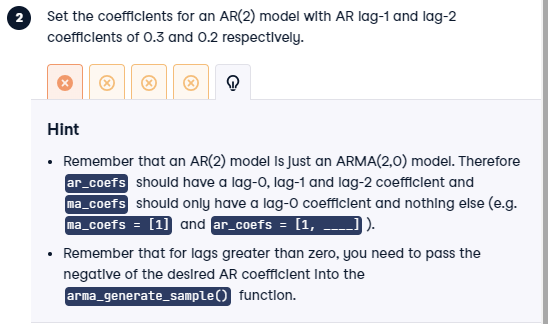

In [ ]:
#퀴즈 3-2-2
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

퀴즈 3-2-3

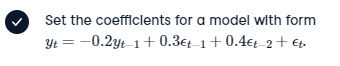

In [ ]:
# 퀴즈 3-2-3
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3,0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

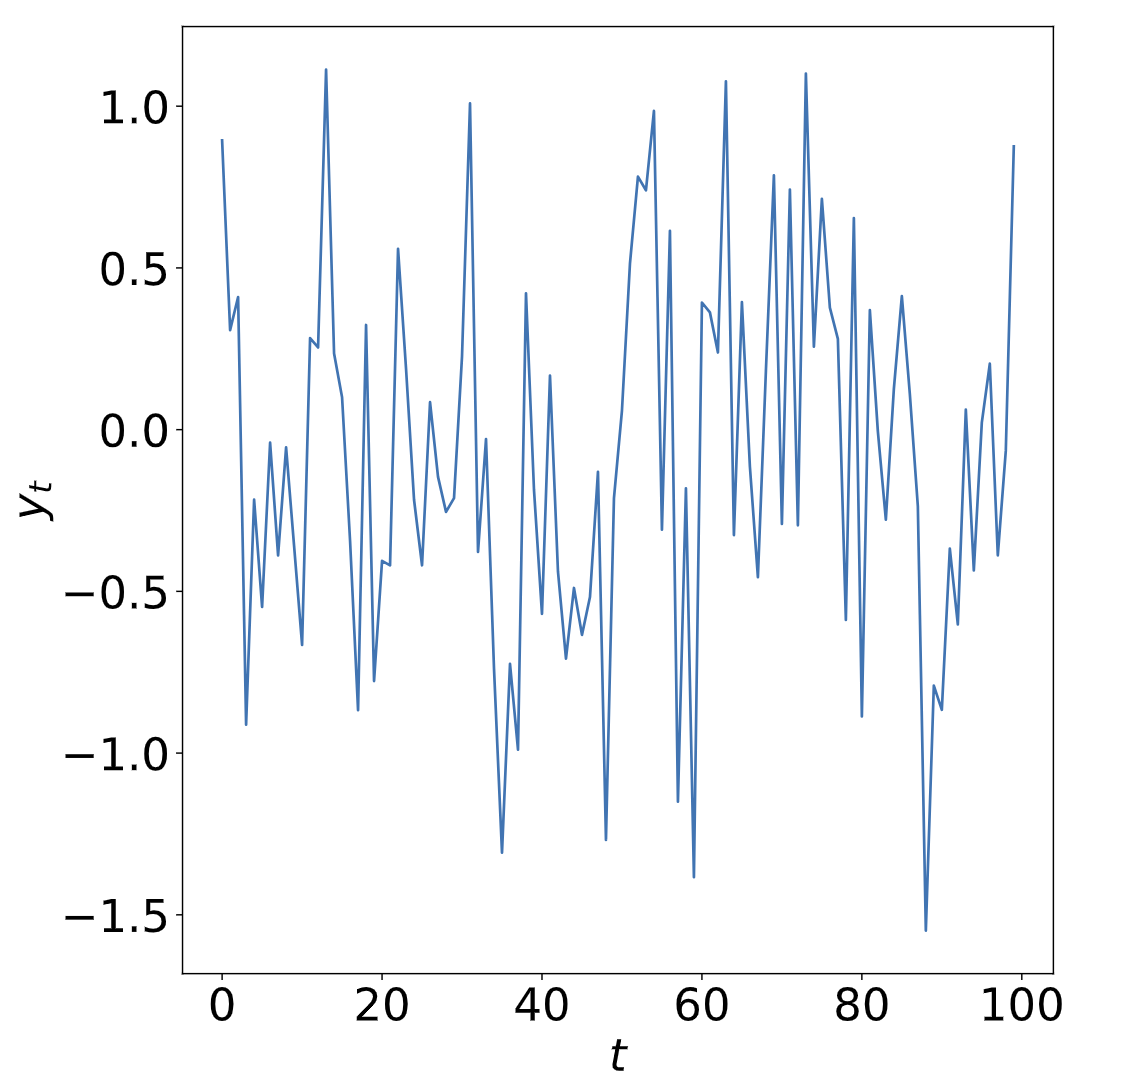

In [ ]:
# 퀴즈 3-3
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1,0,1))

# Fit the model
results = model.fit()